## Shared Biking Data from Washington, DC

In this notebook we look at some data visualizations of this dataset found on Kaggle.

https://www.kaggle.com/marklvl/bike-sharing-dataset/home



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup
import ssl
import json
import csv

**We download and read the dataset into a DataFrame.**

In [26]:
bikeDays = pd.read_csv("biking/hour.csv")

In [27]:
bikeDays.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**It is good to know something about the size of the dataset.**

In [32]:
len(bikeDays)

17379

**And you should always examine the types of your data. Don't rely on Pandas or any other library to always get all the types correct. A type can be inferred incorrectly if you have some dirt in your data (for instance one row might have an incorrect value and that could change the type of the whole column.**

In [28]:
bikeDays.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

## Box and Whisker Plot

**We'll choose to compute a box and whisker plot to understand something about the distribution of the data for at least the continuous data columns. Discrete values may also be analyzed this way as well. First we put together a list of the for columns we wish to analyze.** 

In [33]:
data = [bikeDays["temp"], bikeDays["atemp"], bikeDays["hum"], bikeDays["windspeed"]]

**Then we plot the four columns. The box represents the middle 50% of the data. The line in the box is the median value. The upper and lower ends of the box are the 1st and 3rd Quartile values. The ends of the whiskers are the 3rd Quartile + (1.5\*IQR) and the 1st Quartile - (1.5\*IQR). The IQR is the 3rd-1st Quartile. The dots are the outliers outside the range of most values. It may be that you want to eliminate those rows that lie outside the normal distribution of values. The values on the x-axis are shown as normalized to the range. Normalized means they are shown as percentages between 0 and 1.**

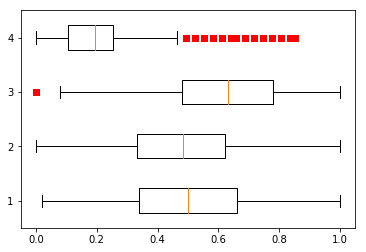

In [34]:
plt.boxplot(data, False, "rs", False)
plt.show()